In [1]:
import daspi as dsp
DPI = 120
dsp.__version__

'0.5.0'

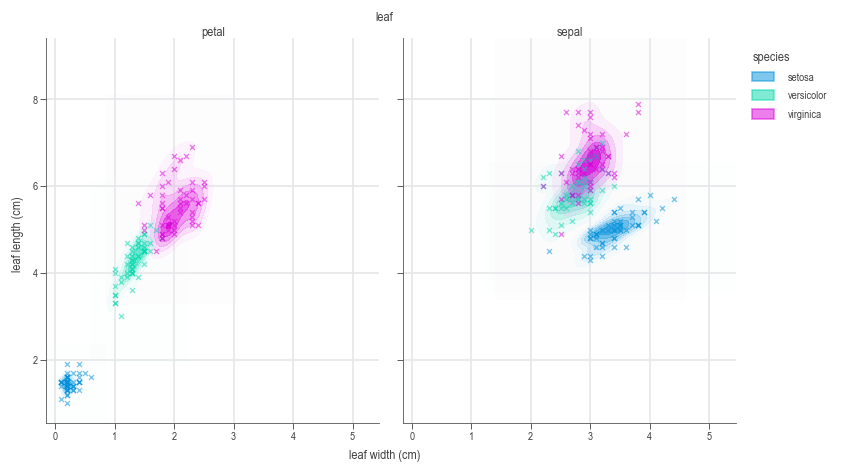

In [2]:
import daspi as dsp
df = dsp.load_dataset('iris')

chart = dsp.MultipleVariateChart(
        source=df,
        target='length',
        feature='width',
        hue='species',
        col='leaf',
        markers=('x',)
    ).plot(
        dsp.GaussianKDEContour
    ).plot(
        dsp.Scatter
    ).label(
        feature_label='leaf width (cm)',
        target_label='leaf length (cm)',
    )

chart.save('docs/img/iris_contour_size-leaf-species.png', dpi=DPI)